<a href="https://colab.research.google.com/github/plaban1981/DEEP-LEARNING-/blob/master/Cell_Images_for_Detecting_Malaria_Classification_using_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
 ! pip install -q kaggle

In [0]:
from google.colab import files

In [3]:
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"plabannayak","key":"8ff01b98f6ffc0cfdabbf6b6918f330c"}'}

In [0]:
 ! mkdir ~/.kaggle

In [0]:
! cp kaggle.json ~/.kaggle/

In [0]:
! chmod 600 ~/.kaggle/kaggle.json

In [7]:
!kaggle datasets download -d iarunava/cell-images-for-detecting-malaria

100% 336M/337M [00:02<00:00, 147MB/s]
100% 337M/337M [00:02<00:00, 141MB/s]


In [9]:
! unzip cell-images-for-detecting-malaria.zip

Archive:  cell-images-for-detecting-malaria.zip
   creating: cell_images/
   creating: cell_images/Parasitized/
 extracting: cell_images/Parasitized/C100P61ThinF_IMG_20150918_144104_cell_162.png  
 extracting: cell_images/Parasitized/C100P61ThinF_IMG_20150918_144104_cell_163.png  
 extracting: cell_images/Parasitized/C100P61ThinF_IMG_20150918_144104_cell_164.png  
 extracting: cell_images/Parasitized/C100P61ThinF_IMG_20150918_144104_cell_165.png  
 extracting: cell_images/Parasitized/C100P61ThinF_IMG_20150918_144104_cell_166.png  
 extracting: cell_images/Parasitized/C100P61ThinF_IMG_20150918_144104_cell_167.png  
 extracting: cell_images/Parasitized/C100P61ThinF_IMG_20150918_144104_cell_168.png  
 extracting: cell_images/Parasitized/C100P61ThinF_IMG_20150918_144104_cell_169.png  
 extracting: cell_images/Parasitized/C100P61ThinF_IMG_20150918_144104_cell_170.png  
 extracting: cell_images/Parasitized/C100P61ThinF_IMG_20150918_144104_cell_171.png  
 extracting: cell_images/Parasitized/C

In [0]:
import os
# Directory with our training horse pictures
train_para_dir = os.path.join('cell_images/Parasitized')

# Directory with our training human pictures
train_unin_dir = os.path.join('cell_images/Uninfected')

**Now, let's see what the filenames look like in the Parasitized and Uninfected training directories**

In [13]:
train_para_names = os.listdir(train_para_dir)
print(train_para_names[:10])
print('='*80)
print('\n')
train_unin_names = os.listdir(train_unin_dir)
print(train_unin_names[:10])

['C176P137NThinF_IMG_20151201_121303_cell_109.png', 'C116P77ThinF_IMG_20150930_171558_cell_108.png', 'C132P93ThinF_IMG_20151004_151811_cell_144.png', 'C99P60ThinF_IMG_20150918_142334_cell_46.png', 'C183P144NThinF_IMG_20151201_224458_cell_121.png', 'C180P141NThinF_IMG_20151201_165601_cell_203.png', 'C39P4thinF_original_IMG_20150622_113446_cell_7.png', 'C59P20thinF_IMG_20150803_112858_cell_197.png', 'C180P141NThinF_IMG_20151201_170021_cell_38.png', 'C75P36_ThinF_IMG_20150815_163742_cell_149.png']


['C90P51ThinF_IMG_20150821_115056_cell_12.png', 'C206ThinF_IMG_20151029_140917_cell_227.png', 'C118P79ThinF_IMG_20151002_110725_cell_26.png', 'C125P86ThinF_IMG_20151004_102013_cell_45.png', 'C219ThinF_IMG_20151106_145927_cell_170.png', 'C173P134NThinF_IMG_20151130_115733_cell_10.png', 'C123P84ThinF_IMG_20151002_152144_cell_9.png', 'C232ThinF_IMG_20151112_154251_cell_265.png', 'C178P139NThinF_IMG_20151201_154337_cell_95.png', 'C154P115ThinF_IMG_20151115_141407_cell_216.png']


**Let's find out the total number of in the Parasitized and Uninfected training directories**

In [14]:
print('total training Parasitized  images:', len(os.listdir(train_para_dir)))
print('total training Uninfected images:', len(os.listdir(train_unin_dir)))

total training Parasitized  images: 13780
total training Uninfected images: 13780


**Visualize the first 4 images**

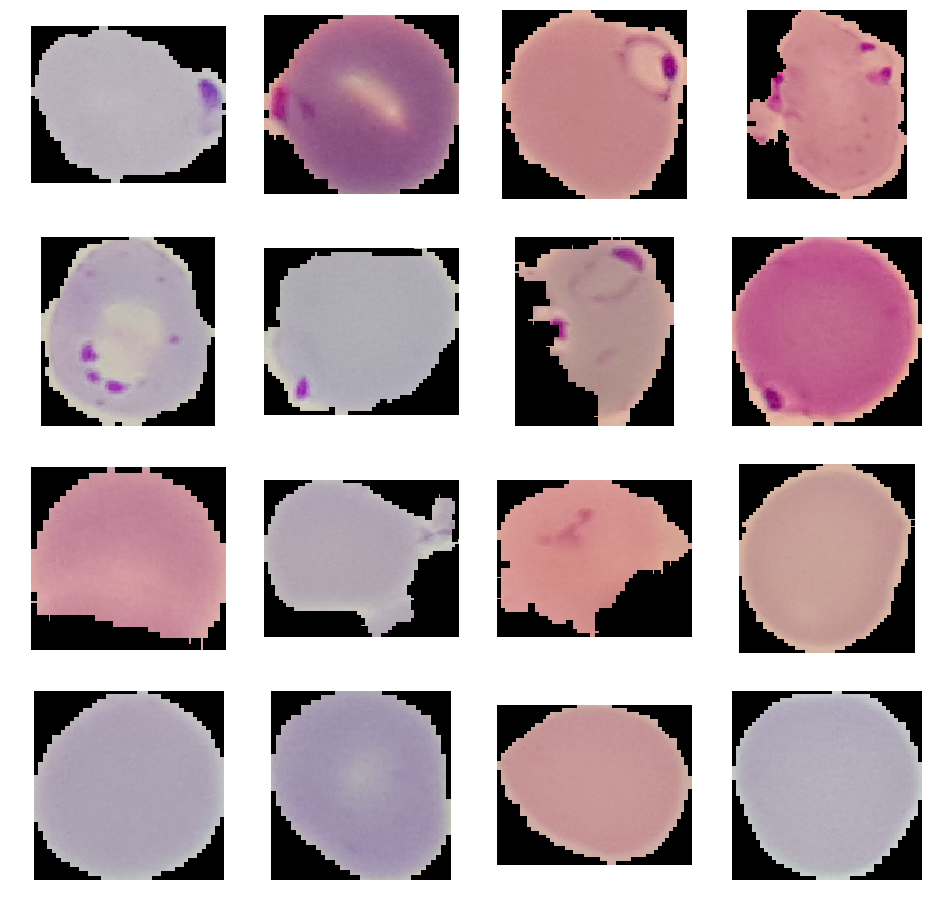

In [15]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0

# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_para_pix = [os.path.join(train_para_dir, fname) 
                for fname in train_para_names[pic_index-8:pic_index]]
next_unin_pix = [os.path.join(train_unin_dir, fname) 
                for fname in train_unin_names[pic_index-8:pic_index]]

for i, img_path in enumerate(next_para_pix+next_unin_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

**Building a Small Model from Scratch**

In [0]:
import tensorflow as tf

**We then add convolutional layers as in the previous example, and flatten the final result to feed into the densely connected layers.**

Finally we add the densely connected layers.

Note that because we are facing a two-class classification problem, i.e. a binary classification problem, we will end our network with a sigmoid activation, so that the output of our network will be a single scalar between 0 and 1, encoding the probability that the current image is class 1 (as opposed to class 0).

In [18]:
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 300x300 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(300, 300, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fifth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('Parasitized') and 1 for the other ('Uninfected')
    tf.keras.layers.Dense(1, activation='sigmoid')
])

Instructions for updating:
Colocations handled automatically by placer.


In [19]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 298, 298, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 149, 149, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 147, 147, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 71, 71, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 35, 35, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 33, 33, 64)        36928     
__________

In [0]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['acc'])

**Data Preprocessing**

Let's set up data generators that will read pictures in our source folders, convert them to float32 tensors, and feed them (with their labels) to our network. We'll have one generator for the training images and one for the validation images. Our generators will yield batches of images of size 300x300 and their labels (binary).

As you may already know, data that goes into neural networks should usually be normalized in some way to make it more amenable to processing by the network. (It is uncommon to feed raw pixels into a convnet.) In our case, we will preprocess our images by normalizing the pixel values to be in the [0, 1] range (originally all values are in the [0, 255] range).

In Keras this can be done via the keras.preprocessing.image.ImageDataGenerator class using the rescale parameter. This ImageDataGenerator class allows you to instantiate generators of augmented image batches (and their labels) via .flow(data, labels) or .flow_from_directory(directory). These generators can then be used with the Keras model methods that accept data generators as inputs: fit_generator, evaluate_generator, and predict_generator.

In [21]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1/255)

# Flow training images in batches of 128 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        'cell_images/',  # This is the source directory for training images
        target_size=(300, 300),  # All images will be resized to 150x150
        batch_size=128,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

Found 27558 images belonging to 2 classes.


**Training**
Let's train for 15 epochs -- this may take a few minutes to run.

Do note the values per epoch.

The Loss and Accuracy are a great indication of progress of training. It's making a guess as to the classification of the training data, and then measuring it against the known label, calculating the result. Accuracy is the portion of correct guesses.

In [23]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=8,  
      epochs=15,
      verbose=1)

Instructions for updating:
Use tf.cast instead.
Epoch 1/15
216/216 [==============================] - 103s 476ms/step - loss: 0.3984 - acc: 0.8038
Epoch 2/15
216/216 [==============================] - 105s 487ms/step - loss: 0.1583 - acc: 0.9509
Epoch 3/15
216/216 [==============================] - 101s 468ms/step - loss: 0.1518 - acc: 0.9528
Epoch 4/15
216/216 [==============================] - 100s 463ms/step - loss: 0.1295 - acc: 0.9574
Epoch 5/15
216/216 [==============================] - 100s 462ms/step - loss: 0.1225 - acc: 0.9594
Epoch 6/15
216/216 [==============================] - 100s 462ms/step - loss: 0.1167 - acc: 0.9616
Epoch 7/15
216/216 [==============================] - 100s 461ms/step - loss: 0.1093 - acc: 0.9617
Epoch 8/15
216/216 [==============================] - 100s 461ms/step - loss: 0.1049 - acc: 0.9637
Epoch 9/15
216/216 [==============================] - 100s 464ms/step - loss: 0.1012 - acc: 0.9654
Epoch 10/15
216/216 [==============================] - 100s 4

**Running the Model**
Let's now take a look at actually running a prediction using the model. This code will allow you to choose 1 or more files from your file system, it will then upload them, and run them through the model, giving an indication of whether the object is a horse or a human.

In [25]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = '/content/' + fn
  img = image.load_img(path, target_size=(300, 300))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes[0])
  if classes[0]>0.5:
    print(fn + " is Unaffected")
    
  else:
    print(fn + " is Parasitized")

Saving 1_dEu2ZRQZUMQE3bejURfO7g.png to 1_dEu2ZRQZUMQE3bejURfO7g (1).png
[0.]
1_dEu2ZRQZUMQE3bejURfO7g.png is Parasitized


**Clean Up**

In [0]:
import os, signal
os.kill(os.getpid(), signal.SIGKILL)